#**KASUS**



Sound system yang adaptif. Yaitu sound system yang akan mengeluarkan tingkat kekerasan suara tergantung dari kebisingan yang ada di latar belakang ruangan tersebut dan jumlah orang yang berada di ruangan tersebut. Sehingga suara dapat terdengar dan nyaman didengar ketika ruangan sepi maupun ramai.

---

###Masukan
Masukan sistem ada 2 yaitu kebisingan dan jumlah orang. Kebisingan diwakili oleh nilai 0-120 dalam satuan desibel dan jumlah orang diwakili oleh 0-30 dalam satuan orang.


*   Kebisisngan:
  1.   Sunyi      (0-50)
  2.   Percakapan (30-90)
  3.   Berisik    (80-120)

*   Jumlah orang:
  1.   Sepi       (0-10)
  2.   Ramai      (8-20)
  3.   Padat      (15-30) 

---

###Luaran
Luaran sistem hanya satu, yaitu keras suara yang harus dikeluarkan untuk menghadapi kondisi ruangan tersebut. Luaran berbentuk nilai 0-100 dalam satuan gain (pengerasan volume).

*  Volume:
  1.   Pelan    (0-30)
  2.   Sedang   (25-75)
  3.   Kencang  (70-100)



---

###Rule
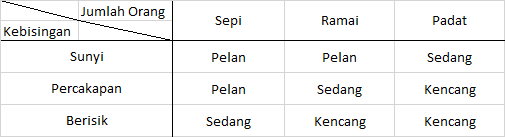


# Code

In [ ]:
#Install sckit-fuzzzy
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=0b67e05761df532b47de9768e3d4f10869ac80f65b4135a9d9ccd1fc110cc26e
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
#Memasukkan library yang digunakan
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Membuat variabel dari masing-masing fungsi keanggotaan
kebisingan = ctrl.Antecedent (np.arange(0,120,1), '騒音 (デシベル)') #variabel masukan untuk fungsi kebisingan, bernilai antara 0-120 db
orang = ctrl.Antecedent (np.arange(0,30,1), '人々の数 (人)')       #variabel masukan untuk fungsi orang, bernilai antara 1-30 orang
volume = ctrl.Consequent (np.arange(0,100,1), '音 (ガイン)')            #variabel luaran untuk fungsi volume, bernilai 0-100 gain

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39442 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12505 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_

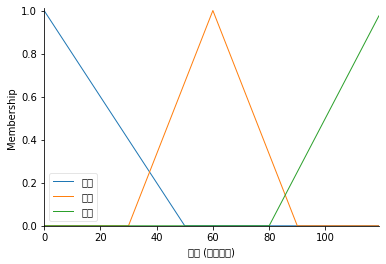

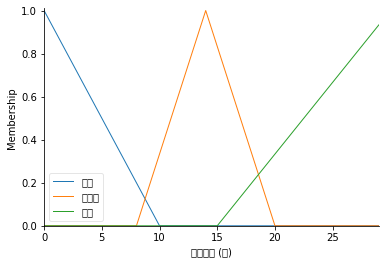

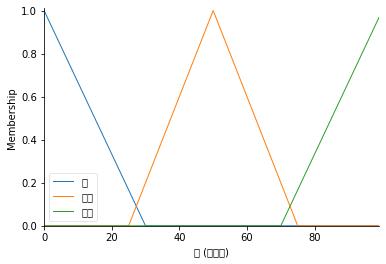

In [ ]:
#Membuat fungsi keanggotaan, fungsi keanggotaan yang digunakan adalah fungsi segitiga
#騒音
kebisingan['静か'] = fuzz.trimf(kebisingan.universe, [0,0,50])         #membuat fungsi keanggotaan untuk sunyi
kebisingan['会話'] = fuzz.trimf(kebisingan.universe, [30,60,90])  #membuat fungsi keanggotaan untuk percakapan
kebisingan['煩い'] = fuzz.trimf(kebisingan.universe, [80,120,120])   #membuat fungsi keanggotaan untuk berisik
#人々の数
orang['空く'] = fuzz.trimf(orang.universe, [0,0,10])                    #membuat fungsi keanggotaan untuk sepi
orang['賑やか'] = fuzz.trimf(orang.universe, [8,14,20])                  #membuat fungsi keanggotaan untuk ramai
orang['過密'] = fuzz.trimf(orang.universe, [15,30,30])                 #membuat fungsi keanggotaan untuk padat
#音のガイン
volume['低'] = fuzz.trimf(volume.universe, [0,0,30])                 #membuat fungsi keanggotaan untuk pelan
volume['適度'] = fuzz.trimf(volume.universe, [25,50,75])              #membuat fungsi keanggotaan untuk sedang
volume['大音'] = fuzz.trimf(volume.universe, [70,100,100])           #membuat fungsi keanggotaan untuk kencang

#Tampilkan bentuk fungsi keanggotaan:
kebisingan.view()
orang.view()
volume.view()

In [ ]:
#Terjemah rule dari tabel FIS di atas
rule1 = ctrl.Rule(((kebisingan['静か']) & orang['空く']) , volume['低'])
rule2 = ctrl.Rule(((kebisingan['静か']) & orang['賑やか']) , volume['低'])
rule3 = ctrl.Rule(((kebisingan['静か']) & orang['過密']) , volume['適度'])
rule4 = ctrl.Rule(((kebisingan['会話']) & orang['空く']) , volume['低'])
rule5 = ctrl.Rule(((kebisingan['会話']) & orang['賑やか']) , volume['適度'])
rule6 = ctrl.Rule(((kebisingan['会話']) & orang['過密']) , volume['大音'])
rule7 = ctrl.Rule(((kebisingan['煩い']) & orang['空く']) , volume['適度'])
rule8 = ctrl.Rule(((kebisingan['煩い']) & orang['賑やか']) , volume['大音'])
rule9 = ctrl.Rule(((kebisingan['煩い']) & orang['過密']) , volume['大音'])

#Implementasi
volume_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]) #implementasi FIS
volume_sys = ctrl.ControlSystemSimulation(volume_ctrl) #implementasi keseluruhan sistem (dengan defuzzyfikasi)

騒音 (0-120 db) = 60
人々の数 (0-30 orang) = 21
音のガインは (0-100) = 87.23913043478258


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38899 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_te

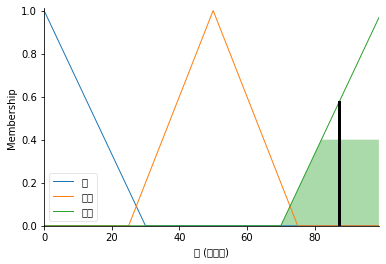

In [ ]:
#Memasukkan nilai Kebisingan dan Jumlah Orang
K = float(input("騒音 (0-120 db) = "))
O = float(input("人々の数 (0-30 orang) = "))
if(K < 0) or (O < 0) or (K > 120) or (O > 30): #cek sesuai range atau tidak
  print ("Nilai yang dimasukan di luar range yang diberikan !!!") #jika tidak sesuai tidak akan dieksekusi
else:
  volume_sys.input['騒音 (デシベル)'] = K #memasukkan nilai input kebisingan ke sistem
  volume_sys.input['人々の数 (人)'] = O #memasukkan nilai input jumlah orang ke sistem
  #Mengeksekusi fuzzy dan merubahnya ke nilai normal (crisp value)
  volume_sys.compute()
  #Menampilkan hasil
  volume.view(sim=volume_sys) #bentuk fuzzy
  print("音のガインは (0-100) =" ,volume_sys.output['音 (ガイン)']) #bentuk crisp value